# Tutorial 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1.1

a) Estimate π by “shooting” (i.e., drawing random numbers) N times uniformly on a
square and counting the number of points hitting a disc target: the ratio of hits to
N should correspond to the ratio of the areas of the target to the area you shoot
on.

In [108]:
def hit_circle(x, y, r):

    return x**2 + y**2 <= r

def estimate_pi(N, r):
    x = np.random.rand(N)*2-1
    y = np.random.rand(N)*2-1

    num_of_hits = np.sum(hit_circle(x, y, r))
    circle_area = 4*num_of_hits/N
    pi = circle_area/(r**2)

    return pi

In [109]:
N = 1000000
radius = 1
print(f" For N = {N}, the estimate of π is {estimate_pi(N, radius)}.")

 For N = 1000000, the estimate of π is 3.141252.


b) Estimate the variance of the error for given N by repeating this a few times.

In [110]:
N = 1000000
radius = 1
iter = 100

pi = []
for i in range(iter):
    pi += [estimate_pi(N, radius)]

error = np.array(pi) - np.pi
variance = np.var(error)

print(f"For N = {N}, the variance of the error is {variance}.")

For N = 1000000, the variance of the error is 2.7564124223999693e-06.


c) Plot the variance of the error versus N on a log-log scale. What is the scaling of
the error?

In [111]:
N = [10**1, 2*(10**1), 10**2, 2*(10**2), 10**3, 10**4, 10**5, 10**6, 10**7]
radius = 1
iter = 100

variance = []
for n in N:
    pi = []
    for i in range(iter):
        pi += [estimate_pi(n, radius)]
    error = np.array(pi) - np.pi
    variance += [np.var(error)]


Text(0.5, 1.0, 'Scaling of Error Variance vs $N$ with Radius $r = 1$')

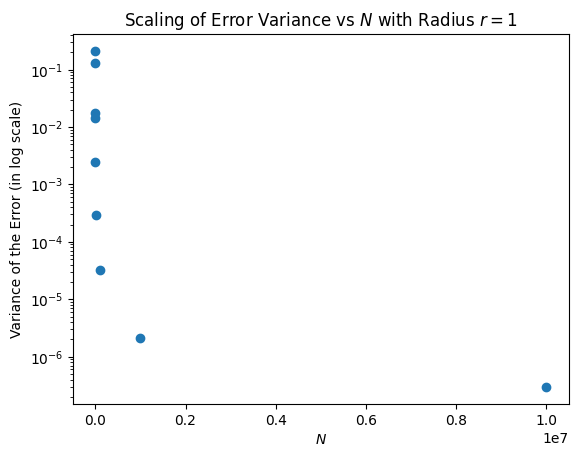

In [115]:
plt.scatter(N,variance)
plt.yscale("log")
plt.xlabel("$N$")
plt.ylabel("Variance of the Error (in log scale)")
plt.title("Scaling of Error Variance vs $N$ with Radius $r = 1$")
plt.show()

$$

\begin{align}
y' &= \log(y) \\
y' &\sim \frac{1}{x} \\
\log(y) &\sim \frac{1}{x} \\
\log(\text{error variance}) &\sim \frac{1}{N}
\end{align}

$$

Now, we turn to a different problem. Consider π given, we use Monte Carlo to estimate
the volume of d-dimension sphere.

d) Generalize your code to estimate the volume of a d-dimensional sphere. Does it run
much slower for large d? How does the error of the estimates scale for d and N?

In [2]:
def hit_d_ball(coord, r):
    
    return np.sum((coord)**2, axis=1) <= r

def estimate_d_ball_volume(N, d, r):
    coord = (np.random.rand(N, d)*2-1)

    num_of_hits = np.sum(hit_d_ball(coord, r))
    d_ball_volume = ((2*r)**d) * num_of_hits/N

    return d_ball_volume

In [6]:
N = 10**6
radius = 1

print(f"For N = {N} and radius r = {radius}, the estimate volume of 2-dimensional sphere (area of circle) is {estimate_d_ball_volume(N, 2, radius)}. And the estimate volume of 3-dimensional sphere (volume of sphere) is {estimate_d_ball_volume(N, 3, radius)}.")

For N = 1000000 and radius r = 1, the estimate volume of 2-dimensional sphere (area of circle) is 3.142436. And the estimate volume of 3-dimensional sphere (volume of sphere) is 4.185552.


In [9]:
import time

N = 10**6
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
radius = 1

runtime = []
volume = []
for dimension in d:
    start = time.time()
    volume += [estimate_d_ball_volume(N, dimension, radius)]
    end = time.time()

    runtime += [end - start]

In [10]:
volume

[2.0,
 3.142536,
 4.192096,
 4.93296,
 5.267456,
 5.178816,
 4.734848,
 4.045056,
 3.304448,
 2.582528,
 1.851392,
 1.339392,
 0.811008,
 0.73728,
 0.393216]

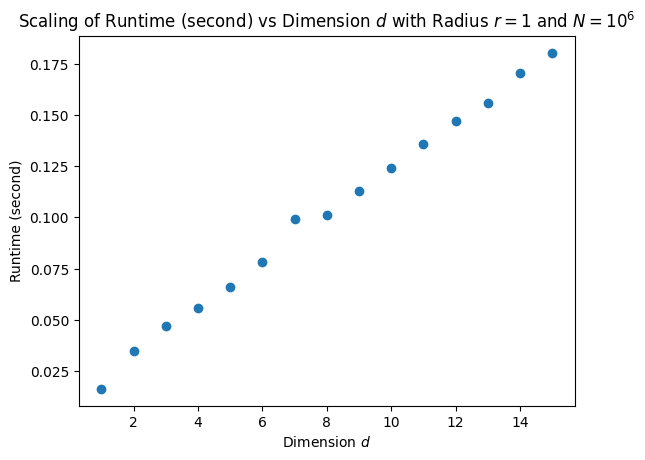

In [13]:
plt.scatter(d,runtime)
plt.xlabel("Dimension $d$")
plt.ylabel("Runtime (second)")
plt.title("Scaling of Runtime (second) vs Dimension $d$ with Radius $r = 1$ and $N = 10^6$")
plt.show()

The runtime scales **linearly** with $d$.

In [ ]:
N = [10**1, 2*(10**1), 10**2, 2*(10**2), 10**3, 10**4, 10**5, 10**6, 10**7]
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
radius = 1


volume = []
for dimension in d:
    volume += [[estimate_d_ball_volume(n, dimension, radius) for n in N]]